# CNN for Image Classification

### Importing Libaraies

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, BatchNormalization,Activation, MaxPooling2D, Dropout
from keras.utils.vis_utils import plot_model
import time

import warnings
warnings.filterwarnings("ignore")

import os
os.environ['PYTHONHASHSEED']=str(0)

import random
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

## Load Dataset

The dataset **Cifar10** consist of images of 10 different classes which are airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. Here, the data set is loaded and is split into the train and val set (test set is used as validation set).

In [2]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data() 

Below are the shapes of train and validation sets. The the shape of input X shows there are 50000 trainig examples in train set and 10000 training example in validation set. The images are of size 32*32 and 3 indicates that picture is RGB. Output dataset has only 1 column with the number dedicated to each type of class.

In [3]:
print('Shape of Train X =', (X_train.shape))
print('Shape of Train y =',  (y_train.shape))
print('Shape of Test X =', (X_val.shape))
print('Shape of Test y =', (y_val.shape))

Shape of Train X = (50000, 32, 32, 3)
Shape of Train y = (50000, 1)
Shape of Test X = (10000, 32, 32, 3)
Shape of Test y = (10000, 1)


### Visualization of data

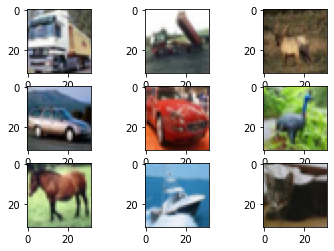

In [4]:
for i in range(1,10):
    plt.subplot(330 + i)
    plt.imshow(X_train[i]) 

plt.show() 

## Pre-Processing Steps

### One Hot Ecodning 

There are 10 categories in the dataset and each category has value assigned to it which is as follows. Converting the output values to binary vector with 1 value for particular image category, which is one hot encoding.    

0 : airplane  
1 : automobile  
2 : bird  
3 : cat   
4 : deer   
5 : dog   
6 : frog   
7 : horse   
8 : ship   
9 : truck   

In [5]:
y_train_n = to_categorical(y_train)
y_val_n = to_categorical(y_val)

### Shape of data after once hot encoding

In [6]:
print('Shape of Train X =', (X_train.shape))
print('Shape of Train y =',  (y_train_n.shape))
print('Shape of Test X =', (X_val.shape))
print('Shape of Test y =',  (y_val_n.shape))

Shape of Train X = (50000, 32, 32, 3)
Shape of Train y = (50000, 10)
Shape of Test X = (10000, 32, 32, 3)
Shape of Test y = (10000, 10)


### Normalizing

The pixel values are scaled between [0,1] by dividing with highest value 255 to normalizse the dataset.

In [7]:
# Converting to float
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

# Divinding by 255
X_train /= 255
X_val /= 255

### Train Test Split

Randomly 20% of train data is used as new train set to the the MLP and CNN models. Test data is used as validation set.

In [8]:
# Spliting the training data randmoly in two sets for using 20% of training data to train the model.
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train_n, test_size=0.80, random_state=42)

In [9]:
# Shapes of new training and validation set
print('Shape of New Train X =', (X_train1.shape))
print('Shape of New Train y =',  (y_train1.shape))
print('Shape of Test X =', (X_val.shape))
print('Shape of Test y =',  (y_val_n.shape))

Shape of New Train X = (10000, 32, 32, 3)
Shape of New Train y = (10000, 10)
Shape of Test X = (10000, 32, 32, 3)
Shape of Test y = (10000, 10)


In [10]:
# Defining number of classes variable to 10 
num_classes = 10

# MLP

- Flatten layer is used convert 3d data in 1d.
- Dense layer creates hidden network with given number of neurons.

In [11]:
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train.shape[1:]))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(num_classes, activation='softmax'))

In [12]:
# Summary of model created
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Fitting the model on data
batch_size = 32
no_epochs = 5
History_mlp = mlp.fit(X_train1, y_train1, validation_data=(X_val, y_val_n), batch_size=batch_size, epochs=no_epochs)

Epoch 1/5
313/313 [==============================] - 18s 10ms/step - loss: 2.1750 - accuracy: 0.1979 - val_loss: 1.9246 - val_accuracy: 0.2981
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9168 - accuracy: 0.3009 - val_loss: 1.8534 - val_accuracy: 0.3312
Epoch 3/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8526 - accuracy: 0.3242 - val_loss: 1.9074 - val_accuracy: 0.3153
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 1.8072 - accuracy: 0.3405 - val_loss: 1.8131 - val_accuracy: 0.3449
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.7572 - accuracy: 0.3584 - val_loss: 1.7883 - val_accuracy: 0.3475


# CNN1

- Conv2d function applies convolution algorithm on data.
- Flatten is used convert 3d data in 1d.
- Dense creates hidden network with given number of neurons.

In [15]:
begin_cnn1 = time.time()
cnn1 = Sequential()
cnn1.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(32,32,3)))
cnn1.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn1.add(Flatten())
cnn1.add(Dense(512, activation='sigmoid'))
cnn1.add(Dense(512, activation='sigmoid'))
cnn1.add(Dense(num_classes, activation='softmax'))

In [16]:
# Compiling the model
cnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Fitting the model on data
batch_size = 32
no_epochs = 5
History_cnn1 = cnn1.fit(X_train1, y_train1,validation_data=(X_val, y_val_n), epochs=no_epochs, batch_size=batch_size)
duration_cnn1 = time.time() - begin_cnn1

Epoch 1/5
313/313 [==============================] - 16s 23ms/step - loss: 1.9873 - accuracy: 0.2671 - val_loss: 1.6148 - val_accuracy: 0.4199
Epoch 2/5
313/313 [==============================] - 6s 21ms/step - loss: 1.3523 - accuracy: 0.5113 - val_loss: 1.3589 - val_accuracy: 0.5044
Epoch 3/5
313/313 [==============================] - 6s 20ms/step - loss: 1.0044 - accuracy: 0.6388 - val_loss: 1.4024 - val_accuracy: 0.5107
Epoch 4/5
313/313 [==============================] - 7s 21ms/step - loss: 0.5973 - accuracy: 0.8029 - val_loss: 1.4031 - val_accuracy: 0.5444
Epoch 5/5
313/313 [==============================] - 7s 22ms/step - loss: 0.2838 - accuracy: 0.9186 - val_loss: 1.6322 - val_accuracy: 0.5462


In [18]:
print('Time taken by CNN1 is : {:.3f}'.format(duration_cnn1))

Time taken by CNN1 is : 42.243


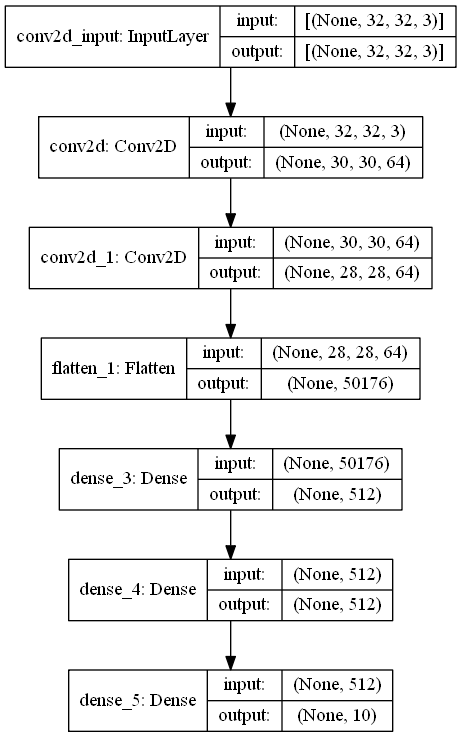

In [19]:
# Structure of model created
plot_model(cnn1, show_shapes=True, show_layer_names=True)

# CNN2

- Conv2d function applies convolution algorithm on data.
- Pooling layers are used to reduce the dimensions of the feature maps.
- Flatten is used convert 3d data in 1d.
- Dense creates hidden network with given number of neurons

In [20]:
begin_cnn2 = time.time()
cnn2 = Sequential()
cnn2.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(32,32,3)))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Flatten())
cnn2.add(Dense(512, activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(512, activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(num_classes, activation='softmax'))

In [21]:
# Compiling the model
cnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Fitting the model on data
batch_size = 32
no_epochs = 5
History_cnn2 = cnn2.fit(X_train1, y_train1,validation_data=(X_val, y_val_n), epochs=no_epochs, batch_size=batch_size)
duration_cnn2 = time.time() - begin_cnn2

Epoch 1/5
313/313 [==============================] - 5s 10ms/step - loss: 2.2283 - accuracy: 0.1713 - val_loss: 1.7127 - val_accuracy: 0.3648
Epoch 2/5
313/313 [==============================] - 3s 8ms/step - loss: 1.6898 - accuracy: 0.3794 - val_loss: 1.5337 - val_accuracy: 0.4381
Epoch 3/5
313/313 [==============================] - 3s 8ms/step - loss: 1.4982 - accuracy: 0.4510 - val_loss: 1.4592 - val_accuracy: 0.4636
Epoch 4/5
313/313 [==============================] - 3s 9ms/step - loss: 1.3788 - accuracy: 0.5009 - val_loss: 1.3611 - val_accuracy: 0.5028
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 1.3173 - accuracy: 0.5226 - val_loss: 1.3287 - val_accuracy: 0.5226


In [23]:
print('Time taken by CNN2 is : {:.3f}'.format(duration_cnn2))

Time taken by CNN2 is : 16.553


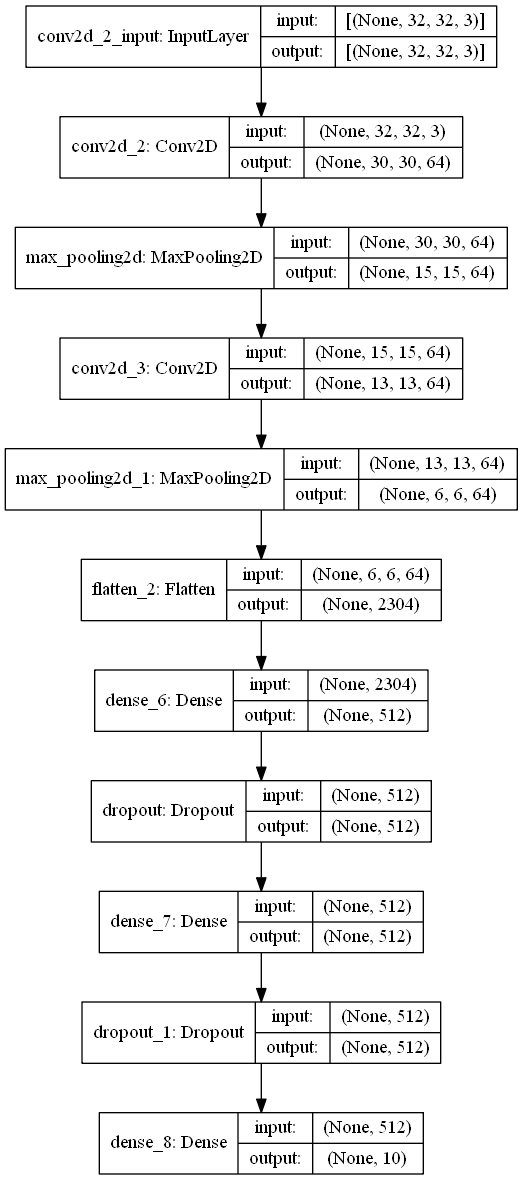

In [24]:
# Structure of model created
plot_model(cnn2, show_shapes=True, show_layer_names=True)

# Plots

Below graphs shows the accuracy versus epoch curve for all the MLP, CNN1 and CNN2 models.

In [25]:
# Function for plotting graphs
def plot_graphs(history,title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

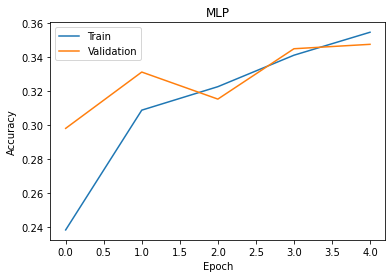

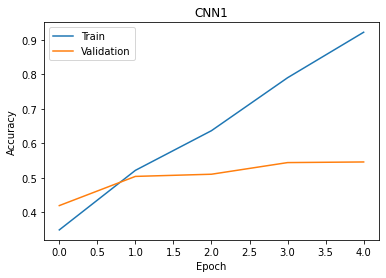

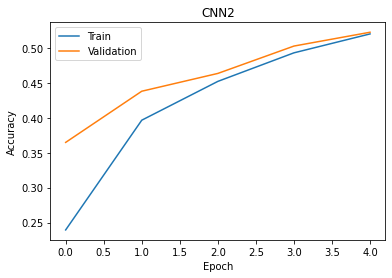

In [26]:
# Plotting curves for all the three models
plot_graphs(History_mlp, 'MLP')
plot_graphs(History_cnn1, 'CNN1')
plot_graphs(History_cnn2, 'CNN2')

## Change in accuracy with more epochs in CNN

In [27]:
cnn1_30 = Sequential()
cnn1_30.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(32,32,3)))
cnn1_30.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn1_30.add(Flatten())
cnn1_30.add(Dense(512, activation='sigmoid'))
cnn1_30.add(Dense(512, activation='sigmoid'))
cnn1_30.add(Dense(num_classes, activation='softmax'))
cnn1_30.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
History_cnn1_30 = cnn1_30.fit(X_train1, y_train1,validation_data=(X_val, y_val_n), epochs=30, batch_size=32, verbose=0)

In [28]:
cnn2_30 = Sequential()
cnn2_30.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(32,32,3)))
cnn2_30.add(MaxPooling2D(pool_size=(2, 2)))
cnn2_30.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn2_30.add(MaxPooling2D(pool_size=(2, 2)))
cnn2_30.add(Flatten())
cnn2_30.add(Dense(512, activation='sigmoid'))
cnn2_30.add(Dropout(0.2))
cnn2_30.add(Dense(512, activation='sigmoid'))
cnn2_30.add(Dropout(0.2))
cnn2_30.add(Dense(num_classes, activation='softmax'))
cnn2_30.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
History_cnn2_30 = cnn2_30.fit(X_train1, y_train1,validation_data=(X_val, y_val_n), epochs=30, batch_size=32, verbose=0)

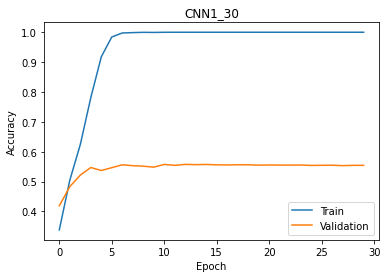

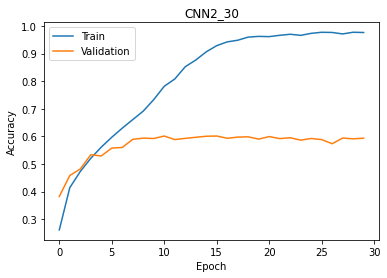

In [29]:
plot_graphs(History_cnn1_30, 'CNN1_30')
plot_graphs(History_cnn2_30, 'CNN2_30')

## Change in accuracy with change in number of layers in MLP

In [30]:
def mlp_changing(layers):
    mlp = Sequential()
    mlp.add(Flatten(input_shape = X_train.shape[1:]))
    for l in range(1,layers+1):
        mlp.add(Dense(512, activation='sigmoid'))
    mlp.add(Dense(num_classes, activation='softmax'))
    return mlp

In [31]:
layers = [2,3,4,5,6,7,8,9,10]
accuracy = []
val_accuracy = []
batch_size = 32
no_epochs = 5

for i in layers:
    mlp = mlp_changing(i)
    mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    History_mlp = mlp.fit(X_train1, y_train1, validation_data=(X_val, y_val_n), batch_size=batch_size, epochs=no_epochs, verbose=0)
    accuracy.append(History_mlp.history['accuracy'][-1])
    val_accuracy.append(History_mlp.history['val_accuracy'][-1])

In [32]:
def plot_layer_acc(layers, accuracy, val_accuracy,xlabel):
    plt.plot(layers, accuracy)
    plt.plot(layers, val_accuracy)
    plt.ylabel('Accuracy')
    plt.xlabel(xlabel)
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

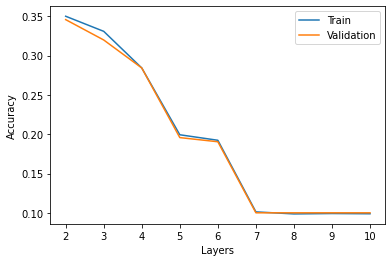

In [33]:
plot_layer_acc(layers, accuracy, val_accuracy, 'Layers')

## Change in accuracy with change in number of neurons in MLP

In [34]:
def mlp_changing_neurons(neurons):
    mlp = Sequential()
    mlp.add(Flatten(input_shape = X_train.shape[1:]))
    mlp.add(Dense(neurons, activation='sigmoid'))
    mlp.add(Dense(neurons, activation='sigmoid'))
    mlp.add(Dense(num_classes, activation='softmax'))
    return mlp

In [35]:
neurons = [8, 16, 32, 64, 128, 256, 512, 1024]
n_accuracy = []
n_val_accuracy = []
batch_size = 32
no_epochs = 5

for i in neurons:
    mlp = mlp_changing_neurons(i)
    mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    History_mlp = mlp.fit(X_train1, y_train1, validation_data=(X_val, y_val_n), batch_size=batch_size, epochs=no_epochs, verbose=0)
    n_accuracy.append(History_mlp.history['accuracy'][-1])
    n_val_accuracy.append(History_mlp.history['val_accuracy'][-1])

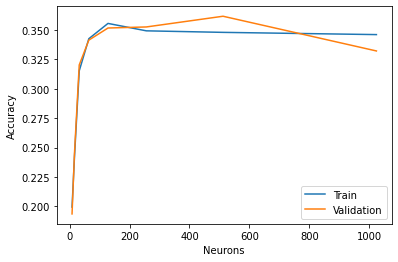

In [36]:
plot_layer_acc(neurons, n_accuracy, n_val_accuracy, 'Neurons')